In [29]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [30]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#import libraries
import os,glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.optimizers import SGD

In [0]:
base_path = '/content/drive/My Drive/Colab Notebooks/garbage_classification'#data path
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))#loading image

In [33]:
len(img_list)#length of dataset

2527

In [34]:
#lets list the type of image to classify
print(os.listdir('/content/drive/My Drive/Colab Notebooks/garbage_classification'))

['glass', 'cardboard', 'metal', 'paper', 'plastic', 'trash', 'garbage_cnn.h5']


In [0]:
#lets plot some image of each type to knoe more about data
def plotimg(image_dir):
    all_imgs = os.listdir(image_dir)
    imgs = [os.path.join(image_dir, file) for file in all_imgs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(imgs):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='RdBu') 

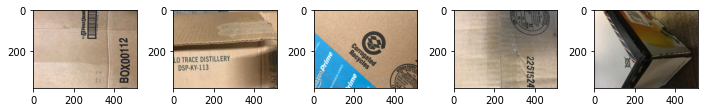

In [36]:
plotimg(base_path+'/cardboard')#plotting cardboaard

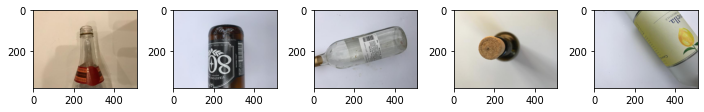

In [37]:
plotimg(base_path+'/glass')#plotting glass

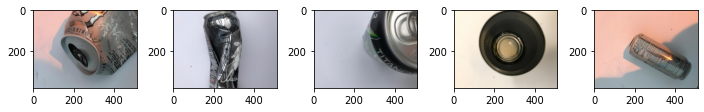

In [38]:
plotimg(base_path+'/metal')#plotting metal

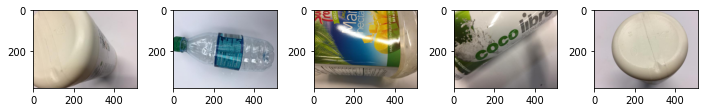

In [39]:
plotimg(base_path+'/plastic')#plotting plastic

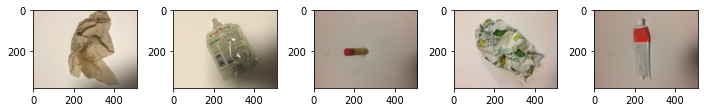

In [40]:
plotimg(base_path+'/trash')#plotting trash

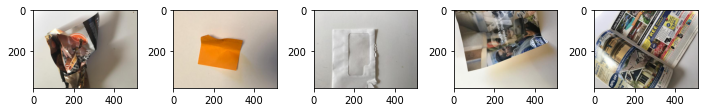

In [41]:
plotimg(base_path+'/paper')#plotting paper

In [42]:
#generate train data and test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test_generator=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_data=train_generator.flow_from_directory(base_path,target_size=(200,200),batch_size=32,class_mode='categorical',subset='training')

test_data=test_generator.flow_from_directory(base_path,target_size=(200,200),batch_size=32,class_mode='categorical',subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [43]:
#print the classses in data
labels = (train_data.class_indices)
print(labels)
#reverse class indices as an encoder
label = dict((v,k) for k,v in labels.items())
print(label)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [0]:
# Create the base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200,200, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [0]:
#compile model with adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
#load the weights file 
model_path="/content/drive/My Drive/Colab Notebooks/garbage_classification/garbage_cnn.h5"
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [0]:
#number of epoch is defined
num_epochs = 100
step_size_train=train_data.n//train_data.batch_size
step_size_test =test_data.n//test_data.batch_size

In [54]:
# Train Model
history = model.fit_generator(train_data, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_data,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 1.8439 - accuracy: 0.2113
Epoch 00001: val_accuracy improved from -inf to 0.17411, saving model to /content/drive/My Drive/Colab Notebooks/garbage_classification/garbage_cnn.h5
71/71 [==============================] - 28s 399ms/step - loss: 1.8439 - accuracy: 0.2113 - val_loss: 1.7394 - val_accuracy: 0.1741
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 1.6527 - accuracy: 0.2709
Epoch 00002: val_accuracy improved from 0.17411 to 0.31250, saving model to /content/drive/My Drive/Colab Notebooks/garbage_classification/garbage_cnn.h5
71/71 [==============================] - 28s 398ms/step - loss: 1.6527 - accuracy: 0.2709 - val_loss: 1.6219 - val_accuracy: 0.3125
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 1.6108 - accuracy: 0.3075
Epoch 00003: val_accuracy improved from 0.31250 to 0.32589, saving model to /content/drive/My Drive/Colab Notebooks/garbage_classification/garbage

In [55]:
model.fit_generator(train_data, epochs=80, steps_per_epoch=step_size_train,validation_data=test_data,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Epoch 1/80
71/71 [==============================] - ETA: 0s - loss: 0.9264 - accuracy: 0.6399
Epoch 00001: val_accuracy did not improve from 0.66964
71/71 [==============================] - 26s 372ms/step - loss: 0.9264 - accuracy: 0.6399 - val_loss: 1.1850 - val_accuracy: 0.6250
Epoch 2/80
71/71 [==============================] - ETA: 0s - loss: 0.9046 - accuracy: 0.6609
Epoch 00002: val_accuracy did not improve from 0.66964
71/71 [==============================] - 26s 368ms/step - loss: 0.9046 - accuracy: 0.6609 - val_loss: 1.1308 - val_accuracy: 0.6071
Epoch 3/80
71/71 [==============================] - ETA: 0s - loss: 0.8767 - accuracy: 0.6631
Epoch 00003: val_accuracy did not improve from 0.66964
71/71 [==============================] - 26s 367ms/step - loss: 0.8767 - accuracy: 0.6631 - val_loss: 1.1164 - val_accuracy: 0.6429
Epoch 4/80
71/71 [==============================] - ETA: 0s - loss: 0.8968 - accuracy: 0.6667
Epoch 00004: val_accuracy did not improve from 0.66964
71/71 [=

In [56]:
model.fit_generator(train_data, epochs=50, steps_per_epoch=step_size_train,validation_data=test_data,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.7389
Epoch 00001: val_accuracy did not improve from 0.72768
71/71 [==============================] - 32s 456ms/step - loss: 0.6728 - accuracy: 0.7389 - val_loss: 1.0400 - val_accuracy: 0.6741
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.7580
Epoch 00002: val_accuracy did not improve from 0.72768
71/71 [==============================] - 33s 459ms/step - loss: 0.6752 - accuracy: 0.7580 - val_loss: 1.3187 - val_accuracy: 0.6384
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 0.7122 - accuracy: 0.7340
Epoch 00003: val_accuracy did not improve from 0.72768
71/71 [==============================] - 32s 458ms/step - loss: 0.7122 - accuracy: 0.7340 - val_loss: 1.3385 - val_accuracy: 0.6741
Epoch 4/50
71/71 [==============================] - ETA: 0s - loss: 0.7374 - accuracy: 0.7117
Epoch 00004: val_accuracy did not improve from 0.72768
71/71 [=

In [57]:
model.fit_generator(train_data, epochs=100, steps_per_epoch=step_size_train,validation_data=test_data,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.7665
Epoch 00001: val_accuracy did not improve from 0.73661
71/71 [==============================] - 33s 458ms/step - loss: 0.6262 - accuracy: 0.7665 - val_loss: 1.2082 - val_accuracy: 0.6875
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 0.5896 - accuracy: 0.7799
Epoch 00002: val_accuracy improved from 0.73661 to 0.74554, saving model to /content/drive/My Drive/Colab Notebooks/garbage_classification/garbage_cnn.h5
71/71 [==============================] - 34s 482ms/step - loss: 0.5896 - accuracy: 0.7799 - val_loss: 1.1931 - val_accuracy: 0.7455
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 0.5677 - accuracy: 0.7839
Epoch 00003: val_accuracy did not improve from 0.74554
71/71 [==============================] - 33s 466ms/step - loss: 0.5677 - accuracy: 0.7839 - val_loss: 1.1825 - val_accuracy: 0.7321
Epoch 4/100
71/71 [==============================] - ET

In [58]:
model.fit_generator(train_data, epochs=50, steps_per_epoch=step_size_train,validation_data=test_data,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.8115
Epoch 00001: val_accuracy did not improve from 0.77232
71/71 [==============================] - 33s 461ms/step - loss: 0.5002 - accuracy: 0.8115 - val_loss: 1.5275 - val_accuracy: 0.6830
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.8298
Epoch 00002: val_accuracy did not improve from 0.77232
71/71 [==============================] - 33s 463ms/step - loss: 0.4617 - accuracy: 0.8298 - val_loss: 1.1012 - val_accuracy: 0.6964
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 0.4859 - accuracy: 0.8222
Epoch 00003: val_accuracy did not improve from 0.77232
71/71 [==============================] - 32s 453ms/step - loss: 0.4859 - accuracy: 0.8222 - val_loss: 1.4386 - val_accuracy: 0.6696
Epoch 4/50
71/71 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.8115
Epoch 00004: val_accuracy did not improve from 0.77232
71/71 [=

In [60]:
model.fit_generator(train_data, epochs=20, steps_per_epoch=step_size_train,validation_data=test_data,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Epoch 1/20
71/71 [==============================] - ETA: 0s - loss: 0.4392 - accuracy: 0.8512
Epoch 00001: val_accuracy did not improve from 0.77232
71/71 [==============================] - 33s 460ms/step - loss: 0.4392 - accuracy: 0.8512 - val_loss: 1.4080 - val_accuracy: 0.7009
Epoch 2/20
71/71 [==============================] - ETA: 0s - loss: 0.4719 - accuracy: 0.8360
Epoch 00002: val_accuracy did not improve from 0.77232
71/71 [==============================] - 33s 459ms/step - loss: 0.4719 - accuracy: 0.8360 - val_loss: 1.4111 - val_accuracy: 0.7098
Epoch 3/20
71/71 [==============================] - ETA: 0s - loss: 0.4482 - accuracy: 0.8369
Epoch 00003: val_accuracy did not improve from 0.77232
71/71 [==============================] - 33s 468ms/step - loss: 0.4482 - accuracy: 0.8369 - val_loss: 1.4246 - val_accuracy: 0.7232
Epoch 4/20
71/71 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.8307
Epoch 00004: val_accuracy did not improve from 0.77232
71/71 [=

In [63]:
# Evaluate Model
score = model.evaluate_generator(test_data, steps=step_size_test)
print(score)


[1.3687463998794556, 0.7276785969734192]


Maximum Probability:  0.9771922
Classified: cardboard


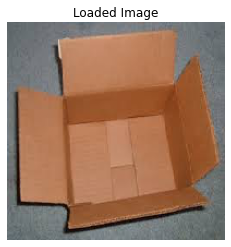

In [79]:
#load the image to test the model by loading image and resize to appropriate shape
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/garbage_classification/cardboard_1.jpg'

img = image.load_img(img_path, target_size=(200, 200))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = label[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

Maximum Probability:  0.41921023
Classified: glass


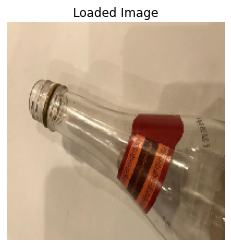

In [84]:
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/garbage_classification/glass/glass67.jpg'

img = image.load_img(img_path, target_size=(200, 200))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = label[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

Maximum Probability:  0.96741253
Classified: paper


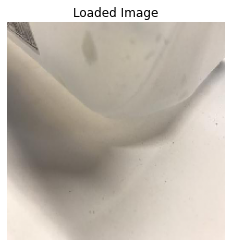

In [85]:
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/garbage_classification/plastic/plastic146.jpg'

img = image.load_img(img_path, target_size=(200, 200))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = label[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)